In [1]:
import json
import pandas as pd
import hdbscan
import numpy as np
from TFTClusterer import TFTClusterer
from save_matchdata import loaddb
from datetime import datetime, timedelta

In [2]:
db = loaddb(timestamp=(datetime.now() - timedelta(hours=4)).timestamp()*1000)
print(len(db))
assert len(db) > 0

113


In [3]:
test=TFTClusterer(db)

In [4]:
print(len(test.clusterdf))

903


In [5]:
test.cluster()

HDB Scan


In [6]:
test.unitshdb.to_csv("unitshdb.csv",index=False)
test.itemshdb.to_csv("itemshdb.csv",index=False)
test.traitshdb.to_csv("traitshdb.csv",index=False)
test.clusterdf[["comp_id","participants.placement","hdb","game_variation"]].to_csv("hdb.csv",index=False)

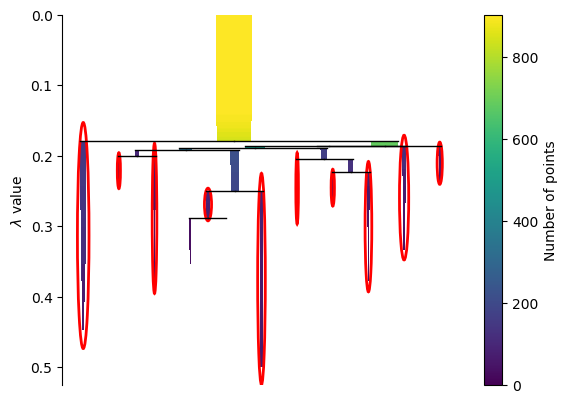

In [7]:
test.plot.figure

In [8]:
test.clusterdf.groupby('hdbnumber')['hdb'].value_counts()
#test.clusterdf['game_variation'].value_counts()

hdbnumber  hdb                   
0          No Comp                   115
1          Cybernetic Blademaster    134
2          Protector Celestial        62
3          Sorcerer Star Guardian    105
4          Chrono Sniper              39
5          Blademaster Rebel          55
6          Rebel Mech-Pilot           27
7          Rebel Blademaster          38
8          Brawler Rebel              77
9          Sniper Astro               82
10         Vanguard Mystic            89
Name: hdb, dtype: int64

In [9]:
test.unitsdf['comptest']=test.unitsdf['participants.placement'].apply(str)+test.unitsdf['match_id']

In [10]:
test.unitsdf['comptest'].nunique()

903

In [17]:
len(test.clusterdf)

823